0. 외부함수 사용을 위해 필요한 라이브러리 불러오기

In [1]:
import finterstellar as fs
import pandas as pd
import numpy as np

In [2]:
K10_dict = {
    '005930' : '삼성전자',
    '000660' : 'SK하이닉스',
    '051910' : 'LG화학',
    '068270' : '셀트리온',
    '005380' : '현대차',
    '207940' : '삼성바이오로직스',
    '005490' : 'POSCO',
    '028260' : '삼성물산',
    '015760' : '한국전력',
    '035420' : 'NAVER'
}

1. 시가총액이 있는 엑셀 파일 읽기: read_excel()

In [3]:
path = './data/'     # 파일위치
n = 'K10_info.xlsx'     # 파일명

In [4]:
file_name = path + n    # 읽어올 파일위치+파일명 지정
stock_info = pd.read_excel(file_name, converters={'code':str})
'''
    pd.read_excel(파일명) - 엑셀파일을 읽어 데이터프레임으로 변환시켜 돌려주는 함수
    converters={'code':str} - 데이터 형식을 '문자'형식으로 지정, 
    생략 시 pd가 이 컬럼을 자동으로 숫자로 인식해 종목코드 앞쪽 0을 삭제해버리게됨
'''
stock_info.set_index('code', inplace=True)
stock_info.head(10)

,name,outstanding
code,,
005930,삼성전자,5969782550
000660,SK하이닉스,728002365
051910,LG화학,70592343
068270,셀트리온,127953489
005380,현대차,213668187
207940,삼성바이오로직스,66165000
005490,POSCO,87186835
028260,삼성물산,189690043
015760,한국전력,641964077


4. 10개 종목의 시세 데이터 로딩 : create_portfolio_df()

In [5]:
n = 'K10_prices.xlsx'     # 파일명

In [6]:
file_name = path + n    # 읽어올 파일위치+파일명 지정
price = pd.read_excel(file_name)
'''
    pd.read_excel(파일명) - 엑셀파일을 읽어 데이터프레임으로 변환시켜 돌려주는 함수
    converters={'code':str} - 데이터 형식을 '문자'형식으로 지정, 
    생략 시 pd가 이 컬럼을 자동으로 숫자로 인식해 종목코드 앞쪽 0을 삭제해버리게됨
'''
price.set_index('trade_date', inplace=True)
price.tail()

,005930,000660,051910,068270,005380,207940,005490,028260,015760,035420
trade_date,,,,,,,,,,
2019-02-13,46200,76200,378000,212000,124500,379500.0,267000,117500.0,34000,125000
2019-02-14,47500,77400,380000,210000,121500,382000.0,266500,117500.0,33800,127500
2019-02-15,46050,73800,380000,209500,121000,380000.0,265500,116000.0,33500,127500
2019-02-18,46200,74700,391000,212000,120500,379000.0,262500,116500.0,33050,127000
2019-02-19,45950,73700,390000,215000,119500,384500.0,268500,116000.0,33000,126500


In [7]:
ld = fs.LoadData()

In [8]:
price = ld.date_formatting(price)
price.head()

,005930,000660,051910,068270,005380,207940,005490,028260,015760,035420
Date,,,,,,,,,,
2006-12-28,12260,36450,61298,4309,67400,NaN,309000,NaN,42400,114100
2007-01-02,12500,37300,62293,4421,67500,NaN,305500,NaN,44150,114500
2007-01-03,12220,36950,63716,4475,67600,NaN,297000,NaN,42000,112200
2007-01-04,12140,37150,63787,4618,66700,NaN,291000,NaN,42100,117000
2007-01-05,11900,37400,63858,4313,65300,NaN,296500,NaN,42600,124300


In [9]:
base_date = '2018-01-02'

In [10]:
price = price[base_date:]
price.head()

,005930,000660,051910,068270,005380,207940,005490,028260,015760,035420
Date,,,,,,,,,,
2018-01-02,51020,76600,411000,225900,149500,389500.0,339000,127500.0,37750,177251
2018-01-03,51620,77700,409500,246700,150500,391000.0,357500,126500.0,37550,174447
2018-01-04,51080,77100,395500,250000,146500,383000.0,367500,128000.0,37200,178854
2018-01-05,52120,79300,405000,266900,149000,390000.0,368000,130000.0,37200,181858
2018-01-08,52020,78200,424500,302500,151000,399500.0,369500,131000.0,37300,190270


In [11]:
stock_info['outstanding']

code
005930    5969782550
000660     728002365
051910      70592343
068270     127953489
005380     213668187
207940      66165000
005490      87186835
028260     189690043
015760     641964077
035420     164813395
Name: outstanding, dtype: int64

In [13]:
market_cap = pd.DataFrame()
market_cap = price * stock_info['outstanding']
market_cap.head()

,005930,000660,051910,068270,005380,207940,005490,028260,015760,035420
Date,,,,,,,,,,
2018-01-02,304578305701000,55764981159000,29013452973000,28904693165100,31943393956500,2.577127e+13,29556337065000,2.418548e+13,24234143906750,29213339077145
2018-01-03,308160175231000,56565783760500,28907564458500,31566125736300,32157062143500,2.587052e+13,31169293512500,2.399579e+13,24105751091350,28751202317565
2018-01-04,304936492654000,56128982341500,27919271656500,31988372250000,31302389395500,2.534120e+13,32041161862500,2.428033e+13,23881063664400,29477534949330
2018-01-05,311145066506000,57730587544500,28589898915000,34150786214100,31836559863000,2.580435e+13,32084755280000,2.465971e+13,23881063664400,29972634387910
2018-01-08,310548088251000,56929784943000,29966449603500,38705930422500,32263896237000,2.643292e+13,32215535532500,2.484940e+13,23945260072100,31359044666650


In [14]:
market_cap['K10'] = market_cap.sum(axis=1)
market_cap.tail()

,005930,000660,051910,068270,005380,207940,005490,028260,015760,035420,K10
Date,,,,,,,,,,,
2019-02-13,275803953810000,55473780213000,26683905654000,27126139668000,26601689281500,2.510962e+13,23278884945000,2.228858e+13,21826778618000,20601674375000,5.247950e+14
2019-02-14,283564671125000,56347383051000,26825090340000,26870232690000,25960684720500,2.527503e+13,23235291527500,2.228858e+13,21698385802600,21013707862500,5.330791e+14
2019-02-15,274908486427500,53726574537000,26825090340000,26806255945500,25853850627000,2.514270e+13,23148104692500,2.200404e+13,21505796579500,21013707862500,5.209346e+14
2019-02-18,275803953810000,54381776665500,27601606113000,27126139668000,25747016533500,2.507654e+13,22886544187500,2.209889e+13,21216912744850,20931301165000,5.228707e+14
2019-02-19,274311508172500,53653774300500,27531013770000,27510000135000,25533348346500,2.544044e+13,23409665197500,2.200404e+13,21184814541000,20848894467500,5.214275e+14


In [15]:
index = pd.DataFrame()
# 첫 날짜를 기준으로 지수화
index['K10'] = round( market_cap['K10'] / market_cap.loc[base_date, 'K10'], 4 ) * 100
# 지수 = 일자별 시가총액 / 기준일 시가총액 * 100 
index.head()

,K10
Date,
2018-01-02,100.00
2018-01-03,101.39
2018-01-04,100.71
2018-01-05,102.86
2018-01-08,104.12


K10 지수 그래프 그리기

In [16]:
v = fs.Visualize()

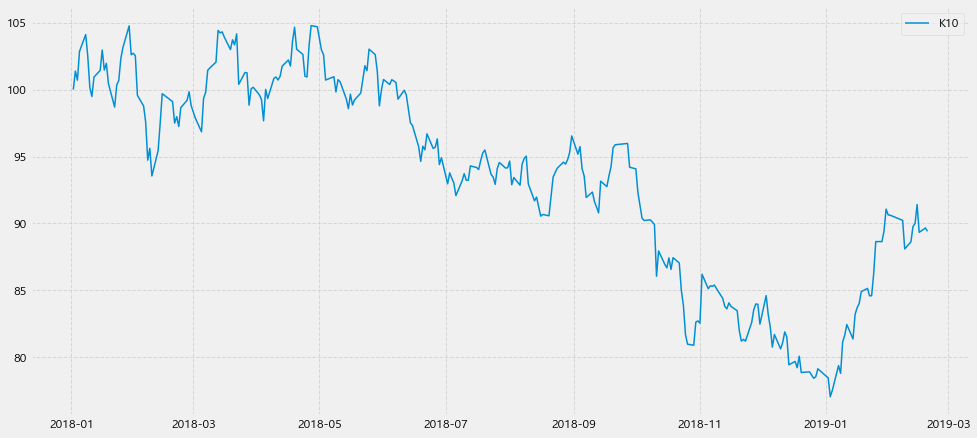

In [17]:
v.price_view(index, base_date, ['K10'])
# price_view(데이터프레임, 기준일자, [종목코드], (사이즈)) - 챠트 그리기

KOSPI200과 비교

In [18]:
K200 = ld.make_historical_price_df(path, 'KOSPI 200')

KOSPI 200 553


In [19]:
K200.head()

,KOSPI 200
Date,
2017-01-02,260.36
2017-01-03,262.97
2017-01-04,263.12
2017-01-05,261.98
2017-01-06,263.20


In [20]:
index['K200'] = K200.loc[base_date:]
# 1월2일 이후 지수만 idx의 K200 컬럼에 담음
index.head()

,K10,K200
Date,,
2018-01-02,100.00,326.00
2018-01-03,101.39,327.13
2018-01-04,100.71,324.58
2018-01-05,102.86,328.97
2018-01-08,104.12,331.28


In [21]:
index = index.fillna(method='ffill')
# NaN 값을 앞의 값으로 채움

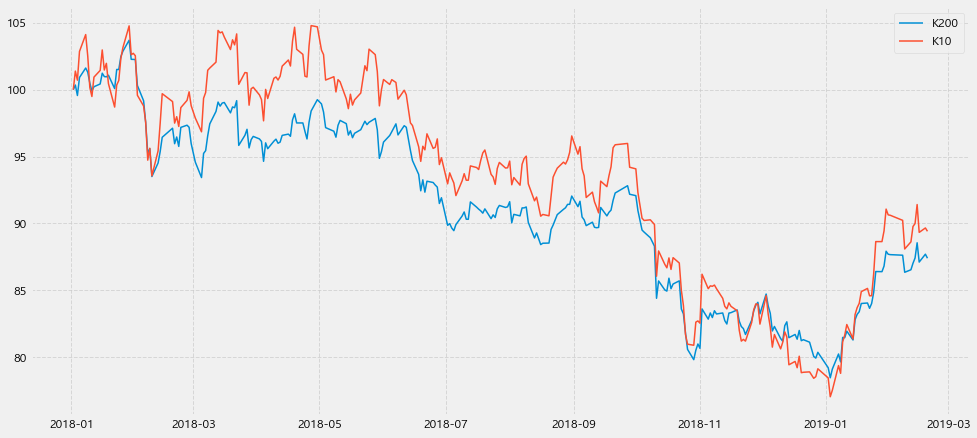

In [22]:
v.index_view(index, base_date, ['K200', 'K10'])
# index_view(데이터프레임, 기준일자, [종목코드], (사이즈)) - 비교를 위해 인덱스화한 그래프 그리기

## 펀드 운용

In [23]:
# 펀드 기본정보 세팅
CU = 1000     # 설정/환매 단위
base_date = pd.to_datetime('2018-01-02')     # 설정 기준일
fund_shares = 0     # 최초 설정수량
fund_price = 10000    # 최초 기준가
interest_rate = 0.02     # 이자율 (현금보유액에 사용)
stock_holdings = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
cash_value = 0

In [24]:
# 주식운용에 필요한 각종 정보를 담을 데이터프레임 생성
K10_Fund = pd.DataFrame(columns=['Price', 'NAV', 'Shares', 'Stock_value', 'Cash_value'])    
# 일별 NAV, 주식보유액, 현금보유액
K10_Fund

,Price,NAV,Shares,Stock_value,Cash_value


In [25]:
K10_weights = pd.DataFrame(columns=market_cap.columns[:-1])     
# K10 각 종목의 보유비중을 담을 데이터프레임 생성
K10_weights

,005930,000660,051910,068270,005380,207940,005490,028260,015760,035420


In [26]:
K10_holdings = pd.DataFrame(columns=market_cap.columns[:-1])     
# K10 각 종목의 보유비중을 담을 데이터프레임 생성
K10_holdings

,005930,000660,051910,068270,005380,207940,005490,028260,015760,035420


In [28]:
stock_holdings

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [29]:
d = base_date

In [30]:
# 1. 기존 보유잔고를 기준으로 기준 NAV 계산 : 종목별 잔고 * 종목별 현재가 + 현금
stock_prices = price.loc[d]
stock_value = sum(stock_holdings * stock_prices)     # 주식 잔고 = 보유수량 * 주가
NAV_old = stock_value + cash_value     # 전체 잔고 = 주식잔고 + 현금잔고
print(stock_prices)
print(NAV_old)

005930     51020.0
000660     76600.0
051910    411000.0
068270    225900.0
005380    149500.0
207940    389500.0
005490    339000.0
028260    127500.0
015760     37750.0
035420    177251.0
Name: 2018-01-02 00:00:00, dtype: float64
0.0


In [31]:
# 2. Creation, Redemption을 반영해 펀드잔고 조정 : 변경좌수
def creation_redemption(v):     # 설정/환매
    creation = np.random.randint(0, 5) * CU     # 랜덤하게 설정/환매 수량 산출
    if v>10000:   # 1만좌 이상일 경우만 해지 가능 (수량이 -가 되지 않도록)
        redemption = np.random.randint(0, 5) * CU
    else:
        redemption = 0
    change = creation - redemption     # 총 좌수 = 기존좌수 + 설정좌수 - 환매좌수
    return(change)

In [32]:
# 3. 기준가 산출 : NAV / 펀드좌수
if d > base_date:
    base_price = NAV_old / fund_shares    # 기준가격 = 펀드총자산 / 펀드총좌수
    share_chg = creation_redemption(fund_shares)
else:
    base_price = fund_price  
    share_chg = 10000  
print(base_price)

10000


In [33]:
# 4. 펀드좌수를 반영해 NAV 조정 : 신규 NAV = 기준 NAV + (기준가 * 변경좌수)
# 총 펀드 좌수에 반영
fund_shares = fund_shares + share_chg     # 펀드좌수 = 기존펀드좌수 + 변동좌수
# 펀드 입출금액 변동분
NAV_chg = base_price * share_chg     # NAV 변동분 = 기준가격 * 변동좌수
# 신규 NAV
NAV = NAV_old + NAV_chg
print(share_chg, fund_shares, NAV_chg, NAV)

10000 10000 100000000 100000000.0


In [34]:
# 5. 종목별 현재가를 반영해 종목별 보유비중 산정 : 종목별 시가총액 / 지수 시가총액
stock_weights = market_cap.loc[d, K10_weights.columns] / market_cap.loc[d, 'K10']   
# (종목별시가총액/K10시가총액) 을 계산해 종목별 보유비중 산정
K10_weights.loc[d] = stock_weights    # 보유비중 기록
print(stock_weights)

005930    0.522285
000660    0.095625
051910    0.049752
068270    0.049565
005380    0.054776
207940    0.044192
005490    0.050683
028260    0.041473
015760    0.041556
035420    0.050094
Name: 2018-01-02 00:00:00, dtype: float64


In [35]:
# 6. 신규 NAV를 반영해 종목별 보유해야 할 수(holdings) 산출 : NAV * 보유비중
# 종목별 보유수량 산정
stock_holdings_old = stock_holdings
stock_holdings = np.floor( NAV * stock_weights / stock_prices ) 
# 신규 주식 거래량 계산 : 
stock_trades = stock_holdings - stock_holdings_old
# 입출금액 변동분 * 주식비중 / 주가  (내림처리, 소수점단위 매매 불가)
print(stock_trades.tolist())
print(stock_holdings.tolist())

[1023.0, 124.0, 12.0, 21.0, 36.0, 11.0, 14.0, 32.0, 110.0, 28.0]
[1023.0, 124.0, 12.0, 21.0, 36.0, 11.0, 14.0, 32.0, 110.0, 28.0]


In [36]:
# 7. 주식보유액, 현금보유액 등 산출 : NAV = 주식보유액 + 현금
K10_holdings.loc[d] = stock_holdings
# 현금 보유량 증가 (이자율 반영)
cash_holdings = np.floor( cash_value * np.exp(interest_rate/365) ) 
stock_value = sum(stock_holdings * stock_prices)     # 주식 잔고
cash_value = int(NAV - stock_value)     # 현금 잔고
print(stock_value)
print(cash_value)

98975788.0
1024212


In [37]:
# 8. 결과 저장
K10_Fund.loc[d, ('Price', 'NAV', 'Shares', 'Stock_value', 'Cash_value')] = \
(base_price, NAV, fund_shares, stock_value, cash_value)

In [38]:
K10_Fund

,Price,NAV,Shares,Stock_value,Cash_value
2018-01-02,10000,1e+08,10000,9.89758e+07,1024212


In [39]:
price.index

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-15',
               ...
               '2019-02-01', '2019-02-07', '2019-02-08', '2019-02-11',
               '2019-02-12', '2019-02-13', '2019-02-14', '2019-02-15',
               '2019-02-18', '2019-02-19'],
              dtype='datetime64[ns]', name='Date', length=276, freq=None)

In [40]:
# 펀드 기본정보 세팅
CU = 1000     # 설정/환매 단위
base_date = pd.to_datetime('2018-01-02')     # 설정 기준일
fund_shares = 0     # 최초 설정수량
fund_price = 10000    # 최초 기준가
interest_rate = 0.02     # 이자율 (현금보유액에 사용)
stock_holdings = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
cash_value = 0
share_chg = 10000

for d in price.index:     # 일자별로 순환하며
    # 1. 기존 보유잔고를 기준으로 기준 NAV 계산 : 종목별 잔고 * 종목별 현재가 + 현금
    stock_prices = price.loc[d]
    stock_value = sum(stock_holdings * stock_prices)     # 주식 잔고 = 보유수량 * 주가
    NAV_old = stock_value + cash_value     # 전체 잔고 = 주식잔고 + 현금잔고
            
    # 2. creation_redemption 함수는 위에서 별도 구현
    
    # 3. 기준가 산출 : NAV / 펀드좌수
    if d == base_date:
        base_price = fund_price  
        share_chg = 10000
    else:
        base_price = NAV_old / fund_shares    # 기준가격 = 펀드총자산 / 펀드총좌수
        share_chg = share_chg = creation_redemption(fund_shares)     # 설정/환매 함수 호출

    # 4. 펀드좌수를 반영해 NAV 조정 : 신규 NAV = 기준 NAV + (기준가 * 변경좌수)
    # 총 펀드 좌수에 반영
    fund_shares = fund_shares + share_chg     # 펀드좌수 = 기존펀드좌수 + 변동좌수
    # 펀드 입출금액 변동분
    NAV_chg = base_price * share_chg     # NAV 변동분 = 기준가격 * 변동좌수
    # 신규 NAV
    NAV = NAV_old + NAV_chg
    
    #print('Date:', d.date(), ' Share:', fund_shares, ' Chages:', share_chg)

    # 5. 종목별 현재가를 반영해 종목별 보유비중 산정 : 종목별 시가총액 / 지수 시가총액
    stock_weights = market_cap.loc[d, K10_weights.columns] / market_cap.loc[d, 'K10']   
    # (종목별시가총액/K10시가총액) 을 계산해 종목별 보유비중 산정
    K10_weights.loc[d] = stock_weights    # 보유비중 기록
    
    # 6. 신규 NAV를 반영해 종목별 보유해야 할 수(holdings) 산출 : NAV * 보유비중
    # 종목별 보유수량 산정
    stock_holdings_old = stock_holdings
    stock_holdings = np.floor( NAV * stock_weights / stock_prices ) 
    # 신규 주식 거래량 계산 : 
    stock_trades = stock_holdings - stock_holdings_old
    # 입출금액 변동분 * 주식비중 / 주가  (내림처리, 소수점단위 매매 불가)
    
    # 7. 주식보유액, 현금보유액 등 산출 : NAV = 주식보유액 + 현금
    K10_holdings.loc[d] = stock_holdings
    # 현금 보유량 증가 (이자율 반영)
    cash_holdings = np.floor( cash_value * np.exp(interest_rate/365) ) 
    stock_value = sum(stock_holdings * stock_prices)     # 주식 잔고
    cash_value = int(NAV - stock_value)     # 현금 잔고

    # 8. 결과 저장
    K10_Fund.loc[d, ('Price', 'NAV', 'Shares', 'Stock_value', 'Cash_value')] =\
    (base_price, NAV, fund_shares, stock_value, cash_value)

In [41]:
# 펀드 수익률 vs 지수 수익률
Earnings = pd.DataFrame()
Earnings['K10'] = ( index['K10']) / index['K10'][base_date] * 100   
Earnings['K200'] = ( index['K200']) / index['K200'][base_date] * 100
Earnings['Fund'] = ( K10_Fund['Price'])/ K10_Fund['Price'][base_date] * 100
Earnings.dropna(inplace=True)

In [42]:
Earnings.head()

,K10,K200,Fund
Date,,,
2018-01-02,100.00,100.000000,100
2018-01-03,101.39,100.346626,101.348
2018-01-04,100.71,99.564417,100.663
2018-01-05,102.86,100.911043,102.796
2018-01-08,104.12,101.619632,104.027


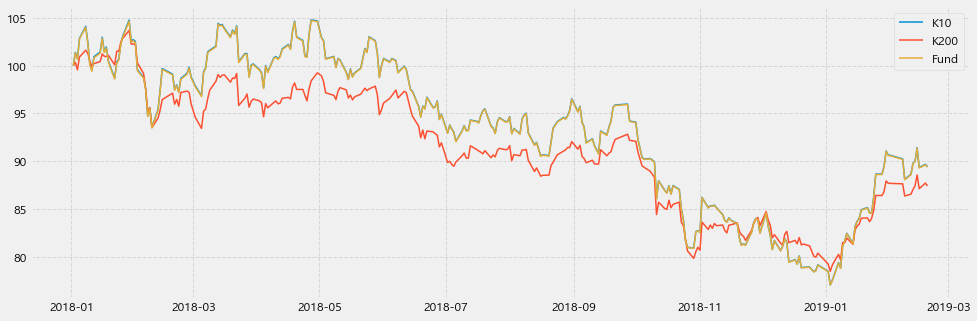

In [43]:
v.index_view(Earnings, base_date, ['K10', 'K200', 'Fund'], size=(15,5))

In [44]:
# 일간 수익률
Daily = pd.DataFrame()
Daily['K10'] = (index['K10'] - index['K10'].shift(1)) / index['K10'].shift(1) 
Daily['K200'] = (index['K200'] - index['K200'].shift(1)) / index['K200'].shift(1) 
Daily['Fund'] = (K10_Fund['Price'] - K10_Fund['Price'].shift(1)) / K10_Fund['Price'].shift(1)  
Daily.dropna(inplace=True)

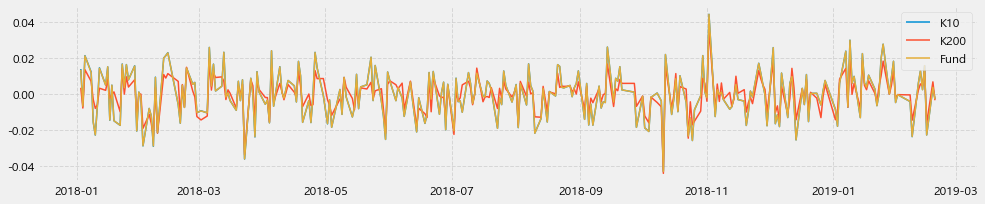

In [45]:
v.price_view(Daily, base_date, ['K10', 'K200', 'Fund'], size=(15,3))

In [46]:
# KOSPI200 대비 일간 추적오차율 
Daily['TE200'] = Daily['Fund'] - Daily['K200']    # 추적오차율 = 펀드수익률 - 지수수익률

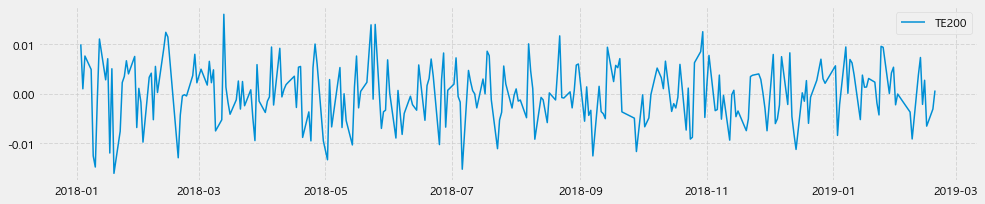

In [47]:
v.price_view(Daily, base_date, 'TE200', size=(15,3))

In [48]:
# K10 대비 일간 추적오차율 
Daily['TE10'] = Daily['Fund'] - Daily['K10']

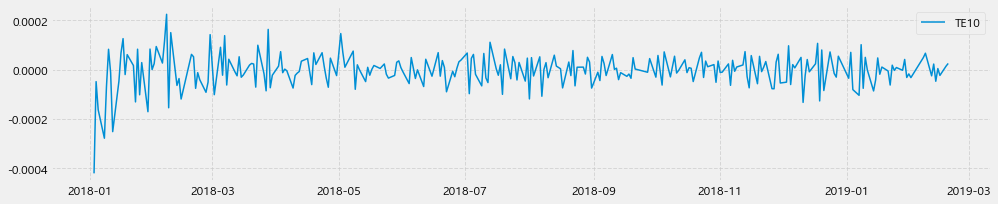

In [49]:
v.price_view(Daily, base_date, 'TE10', size=(15,3))